### 1st Loop

__Feature Engineering:__
- Dropping useless features
- Breaking the date columns
- Dealing with categorial variables (including the target): encoding

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
from catboost import CatBoostClassifier

- __Dropping useless features__

In [81]:
df = pd.read_csv('Candidate_tech_evaluation_candidate_copy_data science_fraud.csv')

df.head(5)

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,149671,285108,7/15/2015 4:36,9/10/2015 14:17,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0
1,15611,131009,1/24/2015 12:29,4/13/2015 4:53,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0
2,73178,328855,3/11/2015 0:54,4/5/2015 12:23,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0
3,84546,229053,1/7/2015 13:19,1/9/2015 10:12,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0
4,35978,108439,2/8/2015 21:11,4/9/2015 14:26,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0


In [82]:
# Unwanted column has to be dismissed
df.drop(df.columns[0],axis=1,inplace=True)

In [83]:
df.drop('device_id',axis=1,inplace=True)

In [84]:
df.drop('user_id',axis=1,inplace=True)

df.head(3)

,signup_time,purchase_time,purchase_value,source,browser,sex,age,ip_address,class
0,7/15/2015 4:36,9/10/2015 14:17,31,Direct,Chrome,M,49,2.818400e+09,0
1,1/24/2015 12:29,4/13/2015 4:53,31,SEO,IE,F,21,3.251268e+09,0
2,3/11/2015 0:54,4/5/2015 12:23,16,Direct,IE,M,26,2.727760e+09,0


- __Breaking the date columns__

In [85]:
df['signup_date'] = df['signup_time'].apply(lambda x: x.split(' ')[0].strip())

df['signup_date'].head(3)

0    7/15/2015
1    1/24/2015
2    3/11/2015
Name: signup_date, dtype: object

In [86]:
df['signup_date_hour'] = df['signup_time'].apply(lambda x: x.split(' ')[1].strip())

df['signup_date_hour'].head(3)

0     4:36
1    12:29
2     0:54
Name: signup_date_hour, dtype: object

In [87]:
df['signup_date_hour'] = df['signup_date_hour'].apply(lambda x: x.split(':')[0].strip())

df['signup_date_hour'] = df['signup_date_hour'].astype('int')

df['signup_date_hour'].unique()

array([ 4, 12,  0, 13, 21, 20,  7,  1, 16,  2, 11,  5, 15,  6, 23, 17, 22,
       19, 18, 14, 10,  3,  9,  8])

In [88]:
df['signup_date_day'] = df['signup_date'].apply(lambda x: x.split('/')[1].strip())

df['signup_date_day'] = df['signup_date_day'].astype('int')

df['signup_date_day'].unique()

array([15, 24, 11,  7,  8, 20, 30, 10,  5, 23, 12, 21, 17,  6,  2, 18, 29,
       28, 27, 14, 26, 19,  4, 22, 13,  1,  3,  9, 16, 25, 31])

In [89]:
df['signup_date_month'] = df['signup_date'].apply(lambda x: x.split('/')[0].strip())

df['signup_date_month'] = df['signup_date_month'].astype('int')

df['signup_date_month'].unique()

array([7, 1, 3, 2, 4, 6, 5, 8])

In [90]:
df['signup_date_day'].unique()

array([15, 24, 11,  7,  8, 20, 30, 10,  5, 23, 12, 21, 17,  6,  2, 18, 29,
       28, 27, 14, 26, 19,  4, 22, 13,  1,  3,  9, 16, 25, 31])

In [91]:
df['signup_date_month'].unique()

array([7, 1, 3, 2, 4, 6, 5, 8])

In [92]:
df['purchase_date_hour'] = df['purchase_time'].apply(lambda x: x.split(' ')[1].strip())

df['purchase_date_hour'] = df['purchase_date_hour'].apply(lambda x: x.split(':')[0].strip())

df['purchase_date_hour'].unique()

array(['14', '4', '12', '10', '20', '16', '17', '13', '21', '11', '5',
       '1', '7', '6', '18', '0', '3', '2', '23', '22', '15', '8', '9',
       '19'], dtype=object)

In [93]:
df['purchase_date_hour'] = df['purchase_date_hour'].astype('int')

In [94]:
df['purchase_date_hour'].unique()

array([14,  4, 12, 10, 20, 16, 17, 13, 21, 11,  5,  1,  7,  6, 18,  0,  3,
        2, 23, 22, 15,  8,  9, 19])

In [95]:
df['purchase_date'] = df['purchase_time'].apply(lambda x: x.split(' ')[0].strip())

df['purchase_date']

0         9/10/2015
1         4/13/2015
2          4/5/2015
3          1/9/2015
4          4/9/2015
            ...    
119995    4/16/2015
119996    8/25/2015
119997     9/3/2015
119998    6/22/2015
119999     9/3/2015
Name: purchase_date, Length: 120000, dtype: object

In [96]:
df['purchase_date_month'] = df['purchase_date'].apply(lambda x: x.split('/')[0].strip())

df['purchase_date_month'] = df['purchase_date_month'].astype('int')

In [97]:
df['purchase_date_month'].unique()

array([ 9,  4,  1,  8,  6, 10,  7,  5,  3,  2, 12, 11])

In [98]:
df['purchase_date_day'] = df['purchase_date'].apply(lambda x: x.split('/')[1].strip())

df['purchase_date_day'] = df['purchase_date_day'].astype('int')

df['purchase_date_day'].unique()

array([10, 13,  5,  9,  3, 30, 25, 20, 12,  2, 19, 24, 26,  4, 28, 15, 16,
       27,  6, 14, 23, 21, 22, 31,  8,  7, 11, 18, 29, 17,  1])

Now I don't need _signup_time_ and _purchase_time_ in the dataset anymore

Also since there is just data from one unique year (2015), I'm gonna delete the respective columns

In [99]:
df.drop('signup_time',axis=1,inplace=True)

In [100]:
df.drop('purchase_time',axis=1,inplace=True)

In [101]:
df.drop('signup_date',axis=1,inplace=True)

In [102]:
df.drop('purchase_date',axis=1,inplace=True)

In [103]:
df.head(3)

,purchase_value,source,browser,sex,age,ip_address,class,signup_date_hour,signup_date_day,signup_date_month,purchase_date_hour,purchase_date_month,purchase_date_day
0,31,Direct,Chrome,M,49,2.818400e+09,0,4,15,7,14,9,10
1,31,SEO,IE,F,21,3.251268e+09,0,12,24,1,4,4,13
2,16,Direct,IE,M,26,2.727760e+09,0,0,11,3,12,4,5


In [104]:
clas = df['class']

clas

0         0
1         0
2         0
3         0
4         0
         ..
119995    0
119996    0
119997    0
119998    0
119999    0
Name: class, Length: 120000, dtype: int64

In [105]:
df.drop('class',axis=1,inplace=True)

In [106]:
df['class'] = clas

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   purchase_value       120000 non-null  int64  
 1   source               120000 non-null  object 
 2   browser              120000 non-null  object 
 3   sex                  120000 non-null  object 
 4   age                  120000 non-null  int64  
 5   ip_address           120000 non-null  float64
 6   signup_date_hour     120000 non-null  int32  
 7   signup_date_day      120000 non-null  int32  
 8   signup_date_month    120000 non-null  int32  
 9   purchase_date_hour   120000 non-null  int32  
 10  purchase_date_month  120000 non-null  int32  
 11  purchase_date_day    120000 non-null  int32  
 12  class                120000 non-null  int64  
dtypes: float64(1), int32(6), int64(3), object(3)
memory usage: 9.2+ MB


- __Dealing with categorial variables (including the target): encoding__

Categorical features to encoding: __source, sex and browser need__

In [108]:
df['source'].unique()

array(['Direct', 'SEO', 'Ads'], dtype=object)

In [109]:
df['source_1'] = df['source'].map(lambda x: 1 if x == 'Direct' else 0)

In [110]:
df['source_2'] = df['source'].map(lambda x: 1 if x == 'SEO' else 0)

In [111]:
df['source_3'] = df['source'].map(lambda x: 1 if x == 'Ads' else 0)

In [112]:
df.drop('source',axis=1,inplace=True)

In [113]:
df['sex_1'] = df['sex'].map(lambda x: 1 if x == 'M' else 0)

In [114]:
df['sex_2'] = df['sex'].map(lambda x: 1 if x == 'F' else 0)

In [115]:
df.drop('sex',axis=1,inplace=True)

In [116]:
df['browser'].unique()

array(['Chrome', 'IE', 'FireFox', 'Safari', 'Opera'], dtype=object)

In [117]:
df['browser_1'] = df['browser'].map(lambda x: 1 if x == 'Chrome' else 0)

In [118]:
df['browser_2'] = df['browser'].map(lambda x: 1 if x == 'IE' else 0)

In [119]:
df['browser_3'] = df['browser'].map(lambda x: 1 if x == 'FireFox' else 0)

In [120]:
df['browser_4'] = df['browser'].map(lambda x: 1 if x == 'Safari' else 0)

In [121]:
df['browser_5'] = df['browser'].map(lambda x: 1 if x == 'Opera' else 0)

In [122]:
df.drop('browser',axis=1,inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   purchase_value       120000 non-null  int64  
 1   age                  120000 non-null  int64  
 2   ip_address           120000 non-null  float64
 3   signup_date_hour     120000 non-null  int32  
 4   signup_date_day      120000 non-null  int32  
 5   signup_date_month    120000 non-null  int32  
 6   purchase_date_hour   120000 non-null  int32  
 7   purchase_date_month  120000 non-null  int32  
 8   purchase_date_day    120000 non-null  int32  
 9   class                120000 non-null  int64  
 10  source_1             120000 non-null  int64  
 11  source_2             120000 non-null  int64  
 12  source_3             120000 non-null  int64  
 13  sex_1                120000 non-null  int64  
 14  sex_2                120000 non-null  int64  
 15  browser_1        

__Modelling prediction:__
- Train/test separation
- Model building/training (XGboost/CatBoost)

In [124]:
X , y = df.drop('class',axis=1), df['class']

In [125]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3,random_state=142)

In [126]:
boost = XGBClassifier()

In [127]:
boost.fit(X_train,y_train)

C:\Users\Dell\anaconda3\envs\DataScienceMeigarom\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [128]:
y_pred = boost.predict(X_test)

__Prediction avaluations:__
- Accuracy
- Confusion Matrix
- Classification Report

__PS: I'm not even gonna use accuracy since the classes are so imbalanced__

In [129]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     32524
           1       0.99      0.53      0.69      3476

    accuracy                           0.95     36000
   macro avg       0.97      0.76      0.83     36000
weighted avg       0.96      0.95      0.95     36000



In [130]:
cf_matrix = confusion_matrix(y_test,y_pred)

confusion_matrix(y_test,y_pred)

array([[32496,    28],
       [ 1631,  1845]], dtype=int64)

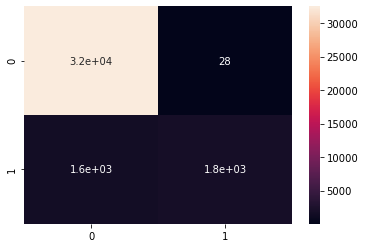

In [131]:
sns.heatmap(cf_matrix, annot=True);

### 2nd Loop

__Feature Engineering:__
- _Balancing the classes (SMOTE)_

In [132]:
smote = SMOTE()

In [133]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [134]:
print('Before SMOTE: ', Counter(y_train))
print('After SMOTE: ',  Counter(y_train_smote))

Before SMOTE:  Counter({0: 76211, 1: 7789})
After SMOTE:  Counter({0: 76211, 1: 76211})


In [135]:
X_train_smote.shape, X_train.shape

((152422, 19), (84000, 19))

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_train_smote,y_train_smote,test_size=0.3,random_state=142)

__Modelling prediction:__
- 2nd modelling

In [137]:
boost = XGBClassifier()

boost.fit(X_train,y_train)

C:\Users\Dell\anaconda3\envs\DataScienceMeigarom\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [138]:
y_pred = boost.predict(X_test)

__Prediction avaluations:__
- Accuracy
- Confusion Matrix
- Classification Report

__PS: Now I can use accuracy because classes are balanced__

In [139]:
accuracy_score(y_pred,y_test)

0.975681763509524

Good result since now its a reliable metric we can trust

In [140]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     23103
           1       1.00      0.95      0.97     22624

    accuracy                           0.98     45727
   macro avg       0.98      0.98      0.98     45727
weighted avg       0.98      0.98      0.98     45727



In [141]:
cf_matrix = confusion_matrix(y_test,y_pred)

confusion_matrix(y_test,y_pred)

array([[23061,    42],
       [ 1070, 21554]], dtype=int64)

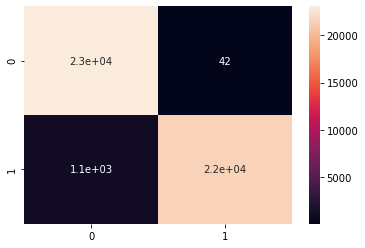

In [142]:
sns.heatmap(cf_matrix, annot=True);

Clearly the SMOTE technque has increased the performance for predictions

__To sum up__:
- True Positives increased tremendously, meaning: more cases of fraud detected accurately

- True Falses also increased tremendously, meaning: more regular transactions could be made without the false alarme or warning from the system

- False Positives increased slightly, meaning: some cases of fraud would be wrongly labelled as fraud therefore cause the system to set unnecessary warnings for these cases

- False Negatives increased slightly, meaning: some frauds would pass by as regular legal transactions causing trouble later on

### 3rd Loop

__Feature Engineering:__
- Forcing a balance for classes

_From the EDA I know the proportion ratio for the classes nearly 9 - 1 for non fraud to fraud_

_So now I'm gona enforce more samples for non fraud cases in a very raw way because I'm running out of time_

In [64]:
df_fraud_yes = df[ df['class'] == 1 ]

In [65]:
df[ df['class'] == 0 ].shape[0]

108735

In [66]:
df_fraud = pd.concat([df_fraud_yes,df_fraud_yes,df_fraud_yes,df_fraud_yes,df_fraud_yes,df_fraud_yes,df_fraud_yes,df_fraud_yes])

In [67]:
new_df = pd.concat([df,df_fraud])

In [68]:
(new_df['class'] == 1).sum()

101385

In [69]:
(df['class'] == 1).sum()

11265

In [70]:
(new_df['class'] == 0).sum()

108735

In [71]:
(df['class'] == 0).sum()

108735

In [72]:
df = new_df.copy()

All checked, classes are nearly balanced
Now I'm going for the modelling again

__Modelling prediction:__
- 3nd modelling

In [73]:
X , y = df.drop('class',axis=1), df['class']

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3,random_state=142)

In [74]:
boost = XGBClassifier()

boost.fit(X_train,y_train)

C:\Users\Dell\anaconda3\envs\DataScienceMeigarom\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:53:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
y_pred = boost.predict(X_test)

__Prediction avaluations:__
- Accuracy
- Confusion Matrix
- Classification Report

__PS: Now I can use accuracy because classes are balanced__

In [76]:
accuracy_score(y_pred,y_test)

0.8247350720223364

Good result since now its a reliable metric we can trust

In [77]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.75      0.98      0.85     32713
           1       0.97      0.65      0.78     30323

    accuracy                           0.82     63036
   macro avg       0.86      0.82      0.82     63036
weighted avg       0.86      0.82      0.82     63036



In [78]:
cf_matrix = confusion_matrix(y_test,y_pred)

confusion_matrix(y_test,y_pred)

array([[32151,   562],
       [10486, 19837]], dtype=int64)

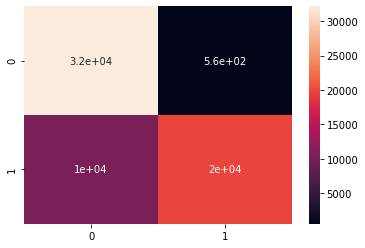

In [79]:
sns.heatmap(cf_matrix, annot=True);

__Conclusions:__ 

- _The number of true positives and true negatives has increased significantly, meaning: way more fraudes would be detected_

- _Also, the number of false positives and false negatives has also increased significantly, meaning: some people would be bothered because their transactions were considere fraudulent by mistake, and also some of the real frauds would pass by unnoticed_

- _The price to improve the performance of true positives and true negatives was too high. It's not worth it_

- _SMOTE oversampling gave a better result_

### 4th Loop

__Feature Engineering:__
- Feature Selection

In [144]:
forest = RandomForestClassifier(random_state=142)
forest.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=142)

In [145]:
importances = forest.feature_importances_

In [153]:
feature_importances = pd.DataFrame(forest.feature_importances_,
             index=X_train_smote.columns,
             columns=['importance']).sort_values('importance',ascending=False)

feature_importances * 100

,importance
purchase_date_month,24.051080
signup_date_month,12.082406
source_3,6.920589
purchase_date_day,6.177721
source_2,5.843738
browser_1,5.751497
sex_2,5.694560
source_1,5.204612
signup_date_day,4.960536
sex_1,4.616287


Now I'm gonna use only the features that have 5% or more importance

In [160]:
feature_importances[ feature_importances * 100 >= 5. ].dropna().index

Index(['purchase_date_month', 'signup_date_month', 'source_3',
       'purchase_date_day', 'source_2', 'browser_1', 'sex_2', 'source_1'],
      dtype='object')

In [161]:
X_train_smote[['purchase_date_month', 'signup_date_month', 'source_3',
       'purchase_date_day', 'source_2', 'browser_1', 'sex_2', 'source_1']]

,purchase_date_month,signup_date_month,source_3,purchase_date_day,source_2,browser_1,sex_2,source_1
0,7.00000,3.000000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000
1,7.00000,5.000000,1.000000,29.000000,0.000000,1.000000,0.000000,0.000000
2,5.00000,4.000000,0.000000,11.000000,0.000000,0.000000,1.000000,1.000000
3,6.00000,4.000000,1.000000,28.000000,0.000000,1.000000,1.000000,0.000000
4,9.00000,8.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
152417,1.00000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000
152418,3.30356,2.303560,0.060712,6.939288,0.939288,1.000000,1.000000,0.000000
152419,2.88729,2.572742,0.314548,14.338129,0.685452,0.685452,1.000000,0.000000
152420,1.00000,1.000000,0.883009,10.830094,0.000000,0.116991,0.883009,0.116991


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_train_smote[['purchase_date_month', 'signup_date_month', 'source_3',
       'purchase_date_day', 'source_2', 'browser_1', 'sex_2', 'source_1']],y_train_smote,test_size=0.3,random_state=142)

__Modelling prediction:__

In [163]:
boost = XGBClassifier()

boost.fit(X_train,y_train)

C:\Users\Dell\anaconda3\envs\DataScienceMeigarom\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
y_pred = boost.predict(X_test)

__Prediction avaluations:__
- Accuracy
- Confusion Matrix
- Classification Report

__PS: Now I can use accuracy because classes are balanced__

In [165]:
accuracy_score(y_pred,y_test)

0.9745664487064535

Good result since now its a reliable metric we can trust

In [166]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     23103
           1       1.00      0.95      0.97     22624

    accuracy                           0.97     45727
   macro avg       0.98      0.97      0.97     45727
weighted avg       0.98      0.97      0.97     45727



In [167]:
cf_matrix = confusion_matrix(y_test,y_pred)

confusion_matrix(y_test,y_pred)

array([[23013,    90],
       [ 1073, 21551]], dtype=int64)

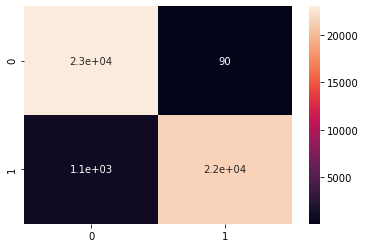

In [168]:
sns.heatmap(cf_matrix, annot=True);

__Conclusions:__ 

- The number of false positives increased and the other predictions didn't improved. 

- Last loop: I'm gonna try CatBoost model since there are many categorical features envolved in this problem

### 5th Loop

__Modelling prediction:__
 - Use catboost (many features are categorical)

Preparing the original dataset to be used properly for catboost model

In [67]:
df = pd.read_csv('Candidate_tech_evaluation_candidate_copy_data science_fraud.csv')

df.head(5)

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,149671,285108,7/15/2015 4:36,9/10/2015 14:17,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0
1,15611,131009,1/24/2015 12:29,4/13/2015 4:53,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0
2,73178,328855,3/11/2015 0:54,4/5/2015 12:23,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0
3,84546,229053,1/7/2015 13:19,1/9/2015 10:12,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0
4,35978,108439,2/8/2015 21:11,4/9/2015 14:26,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0


In [68]:
# Unwanted column has to be dismissed
df.drop(df.columns[0],axis=1,inplace=True)

In [69]:
df.drop('device_id',axis=1,inplace=True)

In [70]:
df.drop('user_id',axis=1,inplace=True)

df.head(3)

,signup_time,purchase_time,purchase_value,source,browser,sex,age,ip_address,class
0,7/15/2015 4:36,9/10/2015 14:17,31,Direct,Chrome,M,49,2.818400e+09,0
1,1/24/2015 12:29,4/13/2015 4:53,31,SEO,IE,F,21,3.251268e+09,0
2,3/11/2015 0:54,4/5/2015 12:23,16,Direct,IE,M,26,2.727760e+09,0


- __Breaking the date columns__

In [71]:
df['signup_date'] = df['signup_time'].apply(lambda x: x.split(' ')[0].strip())

df['signup_date'].head(3)

0    7/15/2015
1    1/24/2015
2    3/11/2015
Name: signup_date, dtype: object

In [72]:
df['signup_date_hour'] = df['signup_time'].apply(lambda x: x.split(' ')[1].strip())

df['signup_date_hour'].head(3)

0     4:36
1    12:29
2     0:54
Name: signup_date_hour, dtype: object

In [73]:
df['signup_date_hour'] = df['signup_date_hour'].apply(lambda x: x.split(':')[0].strip())

df['signup_date_hour'] = df['signup_date_hour'].astype('int')

df['signup_date_hour'].unique()

array([ 4, 12,  0, 13, 21, 20,  7,  1, 16,  2, 11,  5, 15,  6, 23, 17, 22,
       19, 18, 14, 10,  3,  9,  8])

In [74]:
df['signup_date_day'] = df['signup_date'].apply(lambda x: x.split('/')[1].strip())

df['signup_date_day'] = df['signup_date_day'].astype('int')

df['signup_date_day'].unique()

array([15, 24, 11,  7,  8, 20, 30, 10,  5, 23, 12, 21, 17,  6,  2, 18, 29,
       28, 27, 14, 26, 19,  4, 22, 13,  1,  3,  9, 16, 25, 31])

In [75]:
df['signup_date_month'] = df['signup_date'].apply(lambda x: x.split('/')[0].strip())

df['signup_date_month'] = df['signup_date_month'].astype('int')

df['signup_date_month'].unique()

array([7, 1, 3, 2, 4, 6, 5, 8])

In [76]:
df['signup_date_day'].unique()

array([15, 24, 11,  7,  8, 20, 30, 10,  5, 23, 12, 21, 17,  6,  2, 18, 29,
       28, 27, 14, 26, 19,  4, 22, 13,  1,  3,  9, 16, 25, 31])

In [77]:
df['signup_date_month'].unique()

array([7, 1, 3, 2, 4, 6, 5, 8])

In [78]:
df['purchase_date_hour'] = df['purchase_time'].apply(lambda x: x.split(' ')[1].strip())

df['purchase_date_hour'] = df['purchase_date_hour'].apply(lambda x: x.split(':')[0].strip())

df['purchase_date_hour'].unique()

array(['14', '4', '12', '10', '20', '16', '17', '13', '21', '11', '5',
       '1', '7', '6', '18', '0', '3', '2', '23', '22', '15', '8', '9',
       '19'], dtype=object)

In [79]:
df['purchase_date_hour'] = df['purchase_date_hour'].astype('int')

In [80]:
df['purchase_date_hour'].unique()

array([14,  4, 12, 10, 20, 16, 17, 13, 21, 11,  5,  1,  7,  6, 18,  0,  3,
        2, 23, 22, 15,  8,  9, 19])

In [81]:
df['purchase_date'] = df['purchase_time'].apply(lambda x: x.split(' ')[0].strip())

df['purchase_date']

0         9/10/2015
1         4/13/2015
2          4/5/2015
3          1/9/2015
4          4/9/2015
            ...    
119995    4/16/2015
119996    8/25/2015
119997     9/3/2015
119998    6/22/2015
119999     9/3/2015
Name: purchase_date, Length: 120000, dtype: object

In [82]:
df['purchase_date_month'] = df['purchase_date'].apply(lambda x: x.split('/')[0].strip())

df['purchase_date_month'] = df['purchase_date_month'].astype('int')

In [83]:
df['purchase_date_month'].unique()

array([ 9,  4,  1,  8,  6, 10,  7,  5,  3,  2, 12, 11])

In [84]:
df['purchase_date_day'] = df['purchase_date'].apply(lambda x: x.split('/')[1].strip())

df['purchase_date_day'] = df['purchase_date_day'].astype('int')

df['purchase_date_day'].unique()

array([10, 13,  5,  9,  3, 30, 25, 20, 12,  2, 19, 24, 26,  4, 28, 15, 16,
       27,  6, 14, 23, 21, 22, 31,  8,  7, 11, 18, 29, 17,  1])

Now I don't need _signup_time_ and _purchase_time_ in the dataset anymore

Also since there is just data from one unique year (2015), I'm gonna delete the respective columns

In [85]:
df.drop('signup_time',axis=1,inplace=True)

In [86]:
df.drop('purchase_time',axis=1,inplace=True)

In [87]:
df.drop('signup_date',axis=1,inplace=True)

In [88]:
df.drop('purchase_date',axis=1,inplace=True)

In [89]:
df.head(3)

,purchase_value,source,browser,sex,age,ip_address,class,signup_date_hour,signup_date_day,signup_date_month,purchase_date_hour,purchase_date_month,purchase_date_day
0,31,Direct,Chrome,M,49,2.818400e+09,0,4,15,7,14,9,10
1,31,SEO,IE,F,21,3.251268e+09,0,12,24,1,4,4,13
2,16,Direct,IE,M,26,2.727760e+09,0,0,11,3,12,4,5


In [90]:
clas = df['class']

clas

0         0
1         0
2         0
3         0
4         0
         ..
119995    0
119996    0
119997    0
119998    0
119999    0
Name: class, Length: 120000, dtype: int64

In [91]:
df.drop('class',axis=1,inplace=True)

In [92]:
df['class'] = clas

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   purchase_value       120000 non-null  int64  
 1   source               120000 non-null  object 
 2   browser              120000 non-null  object 
 3   sex                  120000 non-null  object 
 4   age                  120000 non-null  int64  
 5   ip_address           120000 non-null  float64
 6   signup_date_hour     120000 non-null  int32  
 7   signup_date_day      120000 non-null  int32  
 8   signup_date_month    120000 non-null  int32  
 9   purchase_date_hour   120000 non-null  int32  
 10  purchase_date_month  120000 non-null  int32  
 11  purchase_date_day    120000 non-null  int32  
 12  class                120000 non-null  int64  
dtypes: float64(1), int32(6), int64(3), object(3)
memory usage: 9.2+ MB


In [94]:
X, y = df.drop('class',axis=1), df['class']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=142)

In [96]:
smote = SMOTE()

In [97]:
float_df = X_train.select_dtypes('float')

In [98]:
int_df = X_train.select_dtypes('int')

In [99]:
joint = float_df.join(int_df)
X_train_smote, y_train_smote = smote.fit_resample(joint,y_train)

In [100]:
print('Before SMOTE: ', Counter(y_train))
print('After SMOTE: ',  Counter(y_train_smote))

Before SMOTE:  Counter({0: 76211, 1: 7789})
After SMOTE:  Counter({0: 76211, 1: 76211})


In [101]:
X_train_smote.shape, X_train.shape

((152422, 9), (84000, 12))

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_train_smote,y_train_smote,test_size=0.3,random_state=142)

In [103]:
cat_features = np.where(X.dtypes == object)[0]

In [106]:
model = CatBoostClassifier(
    iterations=50,
     depth=3,
    learning_rate = 0.1,
    loss_function='CrossEntropy')

In [107]:
model.fit(X_train,y_train,cat_features=cat_features,eval_set=(X_test,y_test))

0:	learn: 0.6559920	test: 0.6561185	best: 0.6561185 (0)	total: 198ms	remaining: 9.72s
1:	learn: 0.6256389	test: 0.6257900	best: 0.6257900 (1)	total: 226ms	remaining: 5.43s
2:	learn: 0.6003635	test: 0.6006430	best: 0.6006430 (2)	total: 256ms	remaining: 4.02s
3:	learn: 0.5789242	test: 0.5793545	best: 0.5793545 (3)	total: 292ms	remaining: 3.36s
4:	learn: 0.5607034	test: 0.5611837	best: 0.5611837 (4)	total: 327ms	remaining: 2.94s
5:	learn: 0.5441521	test: 0.5446453	best: 0.5446453 (5)	total: 360ms	remaining: 2.64s
6:	learn: 0.5302890	test: 0.5308437	best: 0.5308437 (6)	total: 394ms	remaining: 2.42s
7:	learn: 0.5185047	test: 0.5189931	best: 0.5189931 (7)	total: 431ms	remaining: 2.26s
8:	learn: 0.5082531	test: 0.5087905	best: 0.5087905 (8)	total: 465ms	remaining: 2.12s
9:	learn: 0.4990424	test: 0.4996039	best: 0.4996039 (9)	total: 498ms	remaining: 1.99s
10:	learn: 0.4910840	test: 0.4916807	best: 0.4916807 (10)	total: 532ms	remaining: 1.89s
11:	learn: 0.4842065	test: 0.4846508	best: 0.4846508

In [108]:
y_pred = model.predict(X_test)

__Prediction avaluations:__
- Accuracy
- Confusion Matrix
- Classification Report

__PS: Now I can use accuracy because classes are balanced__

In [109]:
accuracy_score(y_pred,y_test)

0.7983029719859164

Good result since now its a reliable metric we can trust

In [110]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.94      0.82     23103
           1       0.91      0.65      0.76     22624

    accuracy                           0.80     45727
   macro avg       0.82      0.80      0.79     45727
weighted avg       0.82      0.80      0.79     45727



In [111]:
cf_matrix = confusion_matrix(y_test,y_pred)

confusion_matrix(y_test,y_pred)

array([[21711,  1392],
       [ 7831, 14793]], dtype=int64)

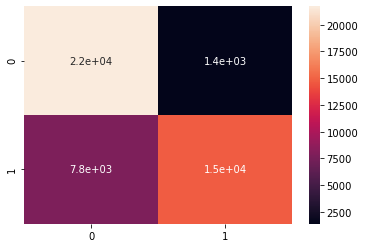

In [112]:
sns.heatmap(cf_matrix, annot=True);

__Conclusions:__ 

- By trying the CatBoost model it was possible to increase the number of true falses but all the other predictions got much worse

- CatBoost underperformed XGboost

I don't have anymore time to work on this test

__Further tasks for improvement:__

- Try gridsearch for hyperparameters tunning

- Use learning curves and then use PCA to reduce features to perform better computationally